# Datasets related to COVID-19 spread. 2020-05-27 06:36:03 

In [260]:
from __future__ import unicode_literals  # or use u"unicode strings"
import os
import numpy as np
import scipy as sc
from scipy.stats import norm
from pprint import pprint

import matplotlib
#matplotlib.use("Qt5Agg")
import matplotlib.pyplot as plt
import pandas as pd
import requests, io
from datetime import datetime
pd.set_option('float_format', '{:f}'.format)

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
np.random.seed(9375739)

In [299]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [261]:
# Preparedness

## %pip install --upgrade --force pandas==1.0.3

#### GLOBAL JOHN HOPKINS DATASETS
_url       = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
_urlrecovered = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
_urldeaths    = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

### LOCAL DATASETS
# ???nada


In [6]:
def read_by_url():
    confirmed   = requests.get(_url).content
    deaths      = requests.get(_urldeaths).content
    recovered   = requests.get(_urlrecovered).content

    _dict = {}
    _recovered = pd.read_csv(io.StringIO(recovered.decode('utf-8')))
    _deaths    = pd.read_csv(io.StringIO(deaths.decode('utf-8')))
    _confirmed = pd.read_csv(io.StringIO(confirmed.decode('utf-8')))
    
    #pd_dataset = pd.DataFrame.from_records({'deaths': _deaths, 'confirmed': _confirmed, 'recovered': _recovered}, index=[0]) 
    
    npfile = './covid-19-recovered.pkl'
    _recovered.to_pickle(npfile)
    npfile = './covid-19-confirmed.pkl'
    _confirmed.to_pickle(npfile)
    npfile = './covid-19-deaths.pkl'
    _deaths.to_pickle(npfile)
    
    pd_dataset = {'deaths': _deaths, 'confirmed': _confirmed, 'recovered': _recovered}
    return pd_dataset
    
def read_by_file(npfile):
    pd_dataset = {}
    pd_dataset = pd.read_pickle(npfile)
    return pd_dataset

a = read_by_url()['recovered']
b = read_by_file("./covid-19-recovered.pkl")
len(a)==len(b)

True

In [7]:
print('reading time series')
import datetime as dt

today = dt.datetime.now().date()

np_file = './covid-19-confirmed.pkl'

if os.path.isfile(np_file):
    filetime = dt.datetime.fromtimestamp(os.path.getctime(np_file))
else:
    filetime = dt.datetime.now()
   
if filetime.date() == today:
    print("File in date")
    if os.path.isfile(np_file):
        print("Read by file")
        np_file = './covid-19-recovered.pkl'
        _recovered = read_by_file(np_file)
        np_file = './covid-19-confirmed.pkl'
        _confirmed = read_by_file(np_file)
        np_file = './covid-19-deaths.pkl'
        _deaths = read_by_file(np_file)    
        pd_dataset = {'deaths': _deaths, 'confirmed': _confirmed, 'recovered': _recovered}

    else:
        print("Read by URL")
        pd_dataset = read_by_url()
else:
    print("File out of date")
    pd_dataset = read_by_url()        

pd_dataset['confirmed']

reading time series
File in date
Read by file


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,15750,16509,17267,18054,18969,19551,20342,20917,21459,22142
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1143,1164,1184,1197,1212,1232,1246,1263,1299,1341
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,9513,9626,9733,9831,9935,10050,10154,10265,10382,10484
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,765,844,851,852,852,852,852,852,852,852
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,86,86,86,86,86,88,91,92,96,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,484,484,484,485,499,499,513,513,514,611
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,354,399,419,453,469,482,484,496,524,560
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,106,132,132,132,132,141,141,141,141,162
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,4013,4100,4191,4289,4370,4453,4529,4609,4690,4763


In [13]:
skip = 4
myset = pd_dataset['confirmed'].loc[pd_dataset['confirmed']['Country/Region'] == 'Argentina' ]

def parse_by_region(dataset, place):    
    myset = dataset.loc[dataset['Country/Region'] == place ]
    dloc = myset.values[0][2]
    dpos = myset.values[0][3]
    # print( 'long: %.4f - lat: %.4f' % ( dloc,dpos ))
    # pprint(myset.values[0])

    datecount = range(len(myset.columns))
    # npf = pd.DataFrame(data = {}, columns=['date','count'])
    npf = []

    m=0
    for n in datecount:
        if n>3:        

            date = myset.columns[n]
            datetime_object = datetime.strptime(date, '%m/%d/%y')
            val = myset.values[0][n]
            pf2 = {m: {'date': datetime_object.date(), 'count': val}}
            npf.append(pf2)        
            m+=1

    return npf

In [14]:
normalized_data = parse_by_region(pd_dataset['confirmed'], 'US')
npf = normalized_data

print("Count matches", len(npf)==len(myset.values[0])-skip)
print("First date: ", npf[0])
print("Last record: ", npf[-1])

Count matches True
First date:  {0: {'date': datetime.date(2020, 1, 22), 'count': 1}}
Last record:  {140: {'date': datetime.date(2020, 6, 10), 'count': 2000464}}


In [296]:
def mean_plot_scatter(p,c,r):
    #province_count = 23
    #daily_percent_change=90
    #region = 'Argentina'
    province_count = p
    daily_percent_change=c
    region = r
    npf = parse_by_region(pd_dataset['confirmed'], region)

    feature_dates=[]
    feature_data=[]
    feature_data_partial=[]
    step = 1
    start = 0

    # TODO calculate partial percents
    for x in np.arange(start, len(npf)-1, step):    
        for key in npf[-x-1].keys():
            date = npf[key][key]['date']        
            prevcount = npf[key-step][key-step]['count']
            count = npf[key][key]['count']
            diff = count-prevcount
            partial = diff/province_count
            if partial!=0.0:
                percent = np.sqrt( (count/100)**2 / (partial/100)**2) #(count/100/len(npf))*partial
            else:
                continue
            if percent>daily_percent_change:
                feature_dates.append(key)
                feature_data.append(count)
                feature_data_partial.append(partial)
                #print(date, count, diff, diff/23, percent)
                #print("%s \t %.3f" %( date, percent))

    x = np.array(feature_dates)
    yy = np.array(feature_data_partial)
    y = np.array(feature_data)

    X = np.column_stack((yy, y**2))
    res = sm.OLS(y, X).fit()
    # print(res.summary())
    #print('Parameters: ', res.params)
    #print('Standard errors: ', res.bse)
    #print('Predicted values: ', res.predict())

    nsample=len(feature_data)
    X = sm.add_constant(X, prepend=True)

    beta = [0.08, 0.5, 1.2]
    sig = 5

    #y_true = np.dot(X, beta)
    y_true = y 
    #y = y_true + sig * np.random.normal(size=nsample)

    prstd, iv_l, iv_u = wls_prediction_std(res)

    #fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(17,9))
    fig, ax = plt.subplots(figsize=(16,8))
    title = 'Daily change > %s percent (%s)' % (daily_percent_change, region)
    ax.set_title(title)

    for i in np.arange(1, len(feature_data_partial), 10):
        #t = "({:3.0f},{:3.1f})".format(x[i], y[i])
        t = "{:3.1f}%".format(yy[i])
        posy = y[i]-10.0
        posx = x[i]-10.0    
        if iv_u[i]>iv_u[i-1]:
            color='red'
        else:
            color='green'
        ax.annotate(s='', xy=(x[i]-0.5,y[i]+50.5), xytext=(posx+1.5,posy+10), arrowprops=dict(arrowstyle='<->'),alpha=0.2)
        ax.text(posx, posy, t, fontsize=12, color='black', bbox=dict(color=color, pad=3.0,alpha=0.4),alpha=1.0)    

    #ax.scatter(x=x, y=y, label='scatter')
    ax.plot(x[::2], y[::2], 'o', label="data",alpha=1.0)
    ax.plot(x, y_true, 'b-', label="Predic",alpha=0.4)

    ax.plot(x, res.fittedvalues, 'r--.', label="Daily",alpha=0.4)
    ax.plot(x, iv_u, 'g--',alpha=0.4)
    ax.plot(x, iv_l, 'g--',alpha=0.4)
    ax.fill_between(x, iv_u, iv_l , facecolor='lightgreen', alpha=0.1)

    fig.legend(loc='upper right');

    fig.legend().set_visible(True)
    fig.legend('',frameon=True)

    ax.set_ylabel('Confirmed cases')
    ax.set_xlabel('Quarantine day No')
    ax.grid(True)
    plt.show()

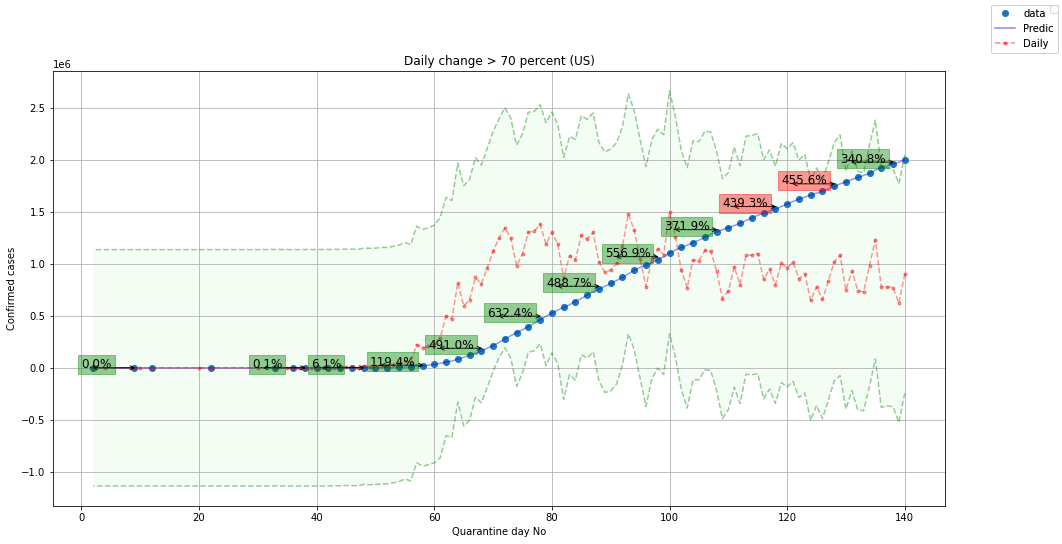

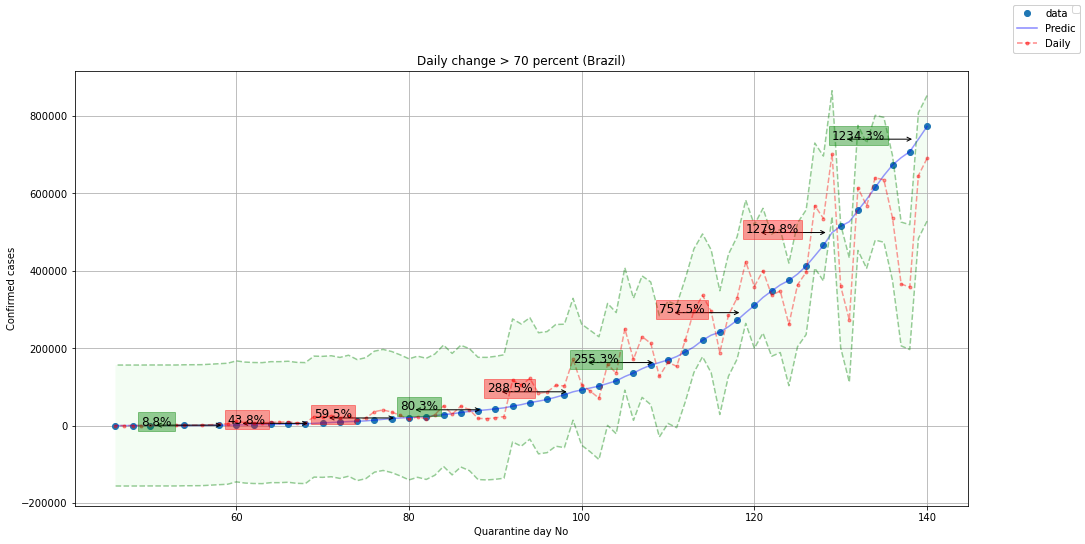

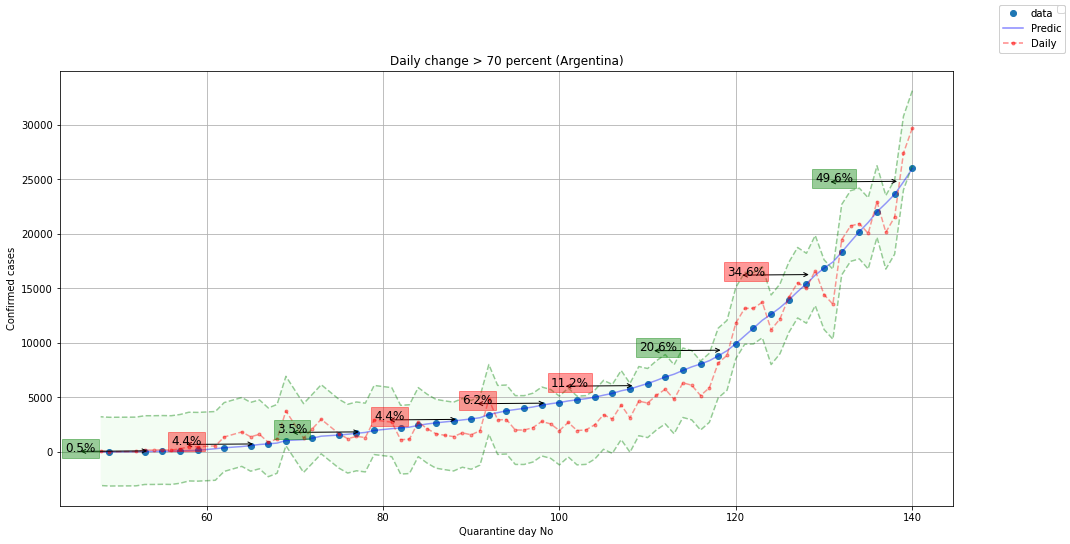

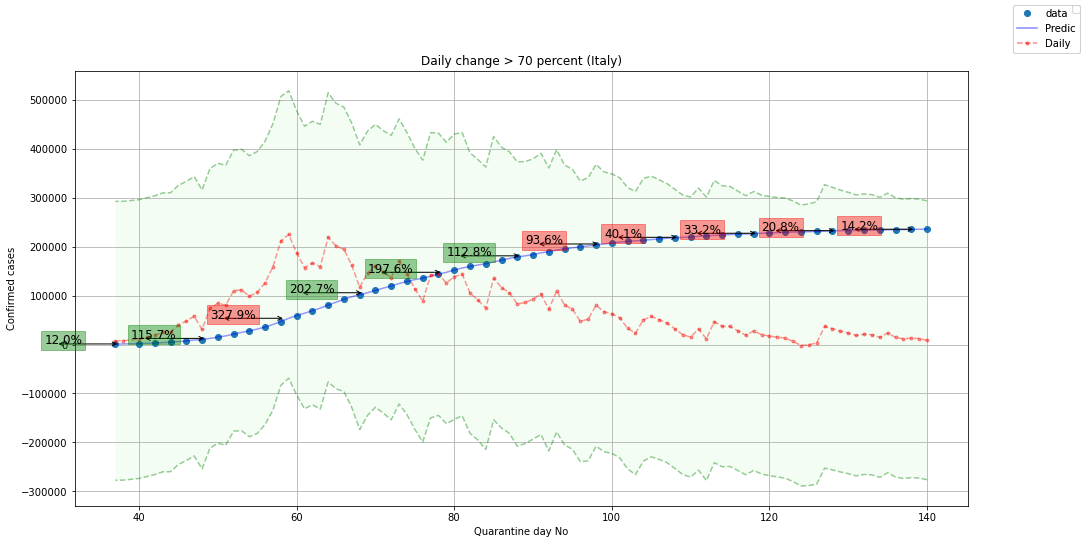

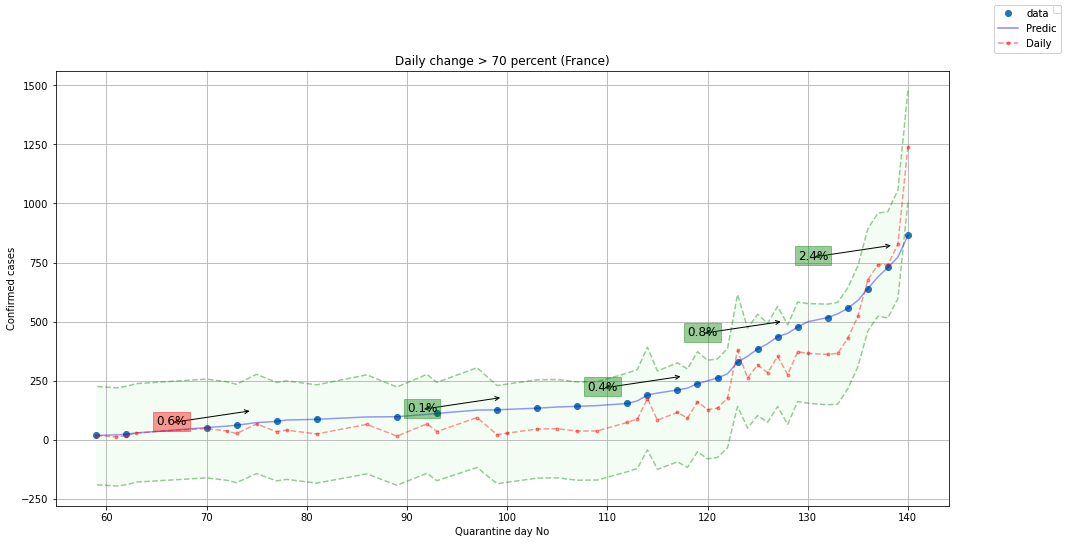

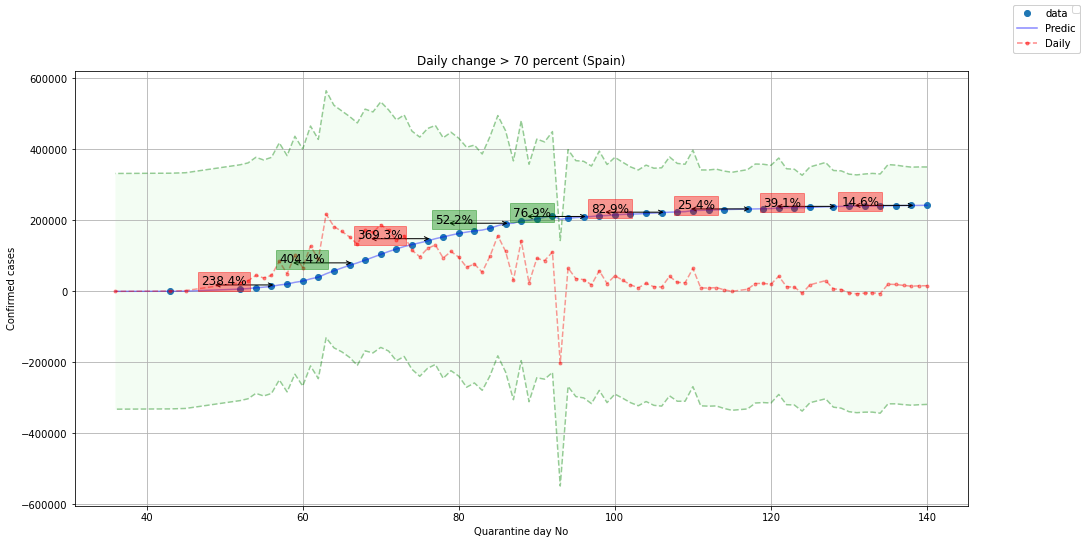

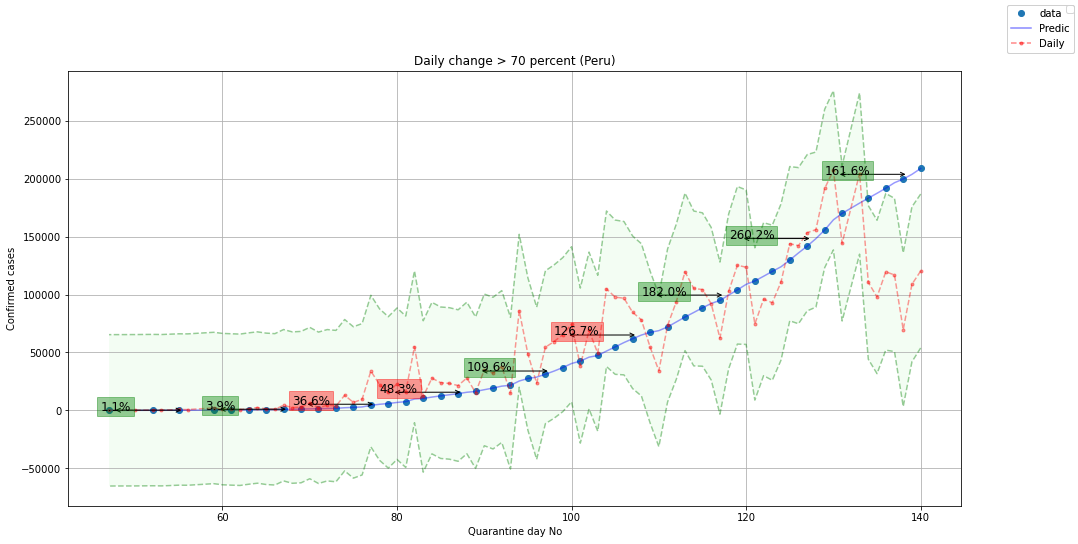

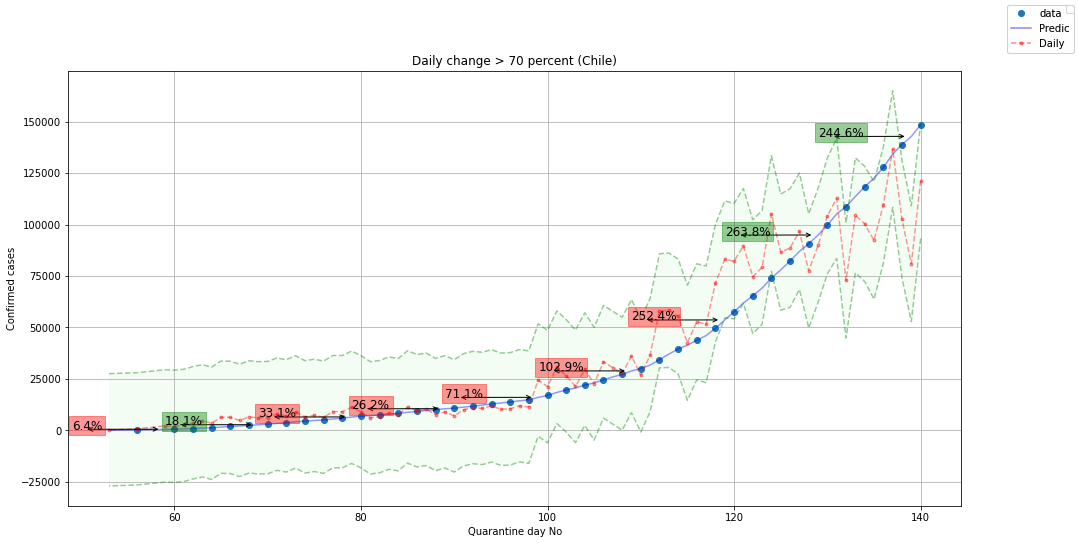

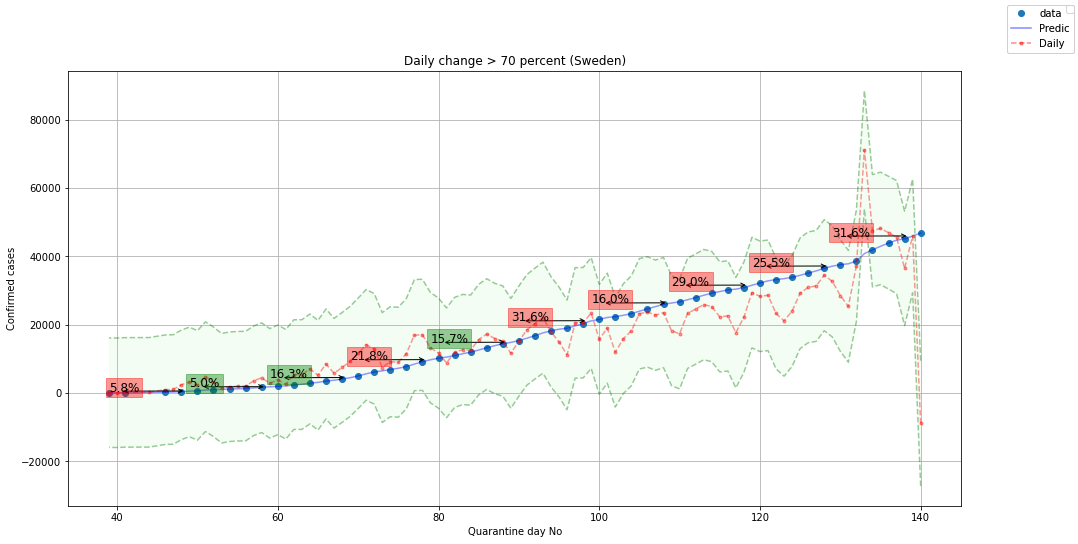

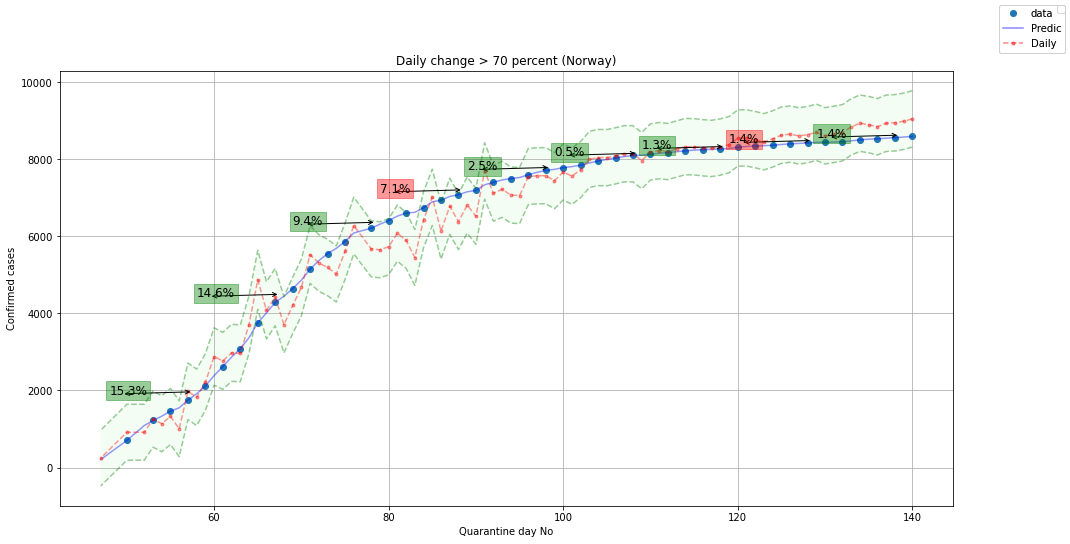

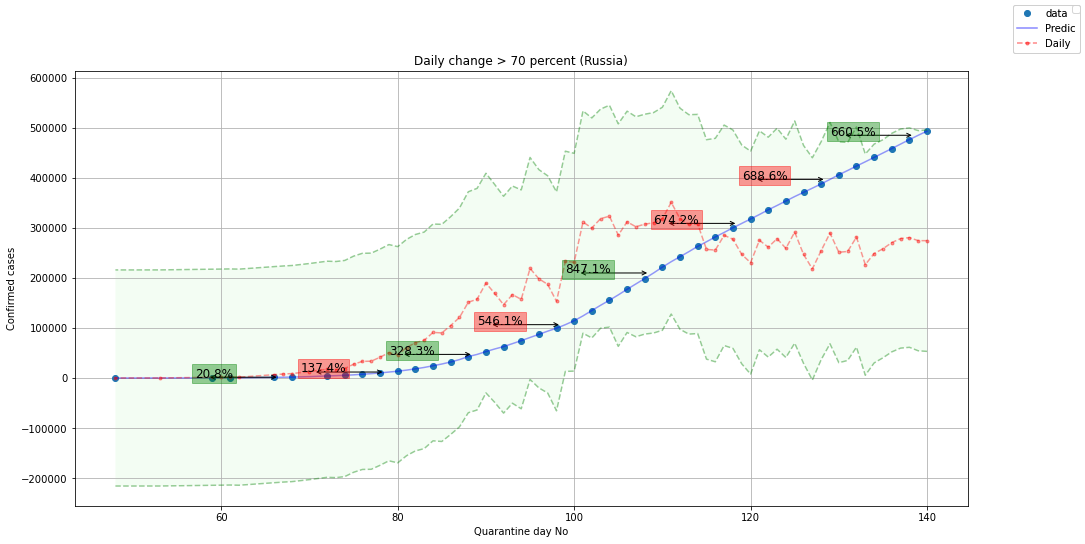

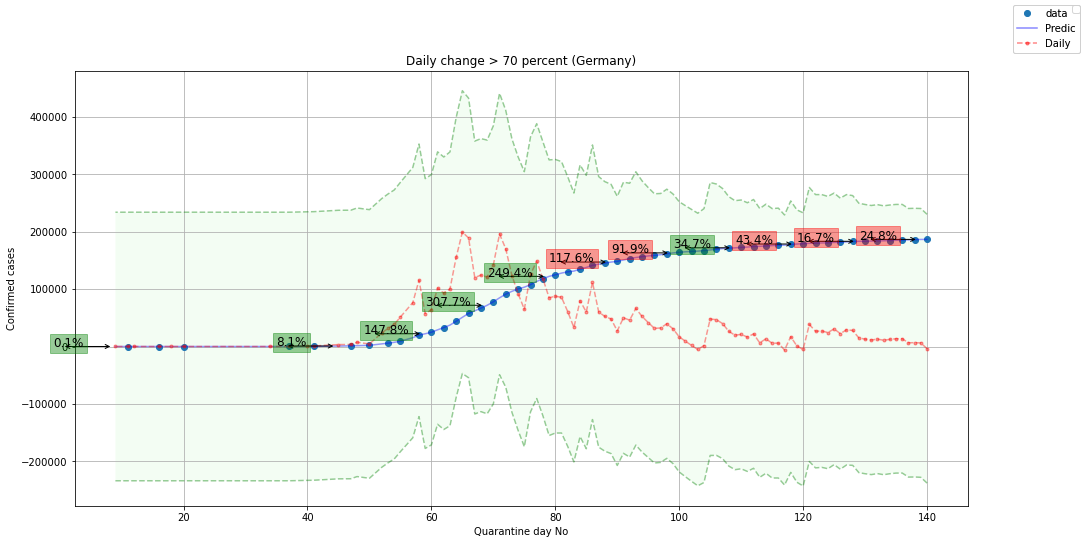

In [302]:
mean_plot_scatter(53, 70, 'US')
mean_plot_scatter(26, 70, 'Brazil')
mean_plot_scatter(23, 70, 'Argentina')
mean_plot_scatter(20, 70, 'Italy')
mean_plot_scatter(18, 70, 'France')
mean_plot_scatter(17, 70, 'Spain')
mean_plot_scatter(25, 70, 'Peru')
mean_plot_scatter(16, 70, 'Chile')
mean_plot_scatter(25, 70, 'Sweden')
mean_plot_scatter(11, 70, 'Norway')
mean_plot_scatter(13, 70, 'Russia')
mean_plot_scatter(16, 70, 'Germany')

In [304]:
def extract_remarks(datasets, placeslist):
    for place in placeslist:
        for dataset in datasets:
            legend=dataset[0]
            ndata = parse_by_region(dataset[1], place)
            size = len(ndata)
            val = ndata[-1][size-1]['date']
            total = ndata[-1][size-1]['count']
            print("%s:\t\t %s\t => %s" %( place+legend, total,  val))
            n0,n1,n2,n3=(True,True,True,True)
            for n in range(size):
                first = ndata[n][n]['count']
                if first>0 and n0:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (1, date))
                    n0=False
                if first>100 and n1:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (100, date))
                    n1=False
                if first>1000 and n2:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (1000, date))
                    n2=False
                if first>10000 and n3:
                    date = ndata[n][n]['date']
                    print("\t +%s case: %s"% (10000, date))
                    n3=False

        print()

regions = ['Argentina','Chile', 'Peru', 'Brazil', 'Uruguay', 'Spain', 'France', 'US', 'Germany', 'Sweden', 'Russia']
ds = [['_confir', pd_dataset['confirmed']] , ['_deaths', pd_dataset['deaths']]]
extract_remarks(ds, regions)


Argentina_confir:		 25987	 => 2020-06-10
	 +1 case: 2020-03-03
	 +100 case: 2020-03-20
	 +1000 case: 2020-03-31
	 +10000 case: 2020-05-22
Argentina_deaths:		 735	 => 2020-06-10
	 +1 case: 2020-03-08
	 +100 case: 2020-04-14

Chile_confir:		 148456	 => 2020-06-10
	 +1 case: 2020-03-03
	 +100 case: 2020-03-16
	 +1000 case: 2020-03-25
	 +10000 case: 2020-04-19
Chile_deaths:		 2475	 => 2020-06-10
	 +1 case: 2020-03-22
	 +100 case: 2020-04-16
	 +1000 case: 2020-05-31

Peru_confir:		 208823	 => 2020-06-10
	 +1 case: 2020-03-06
	 +100 case: 2020-03-17
	 +1000 case: 2020-03-31
	 +10000 case: 2020-04-14
Peru_deaths:		 5903	 => 2020-06-10
	 +1 case: 2020-03-20
	 +100 case: 2020-04-07
	 +1000 case: 2020-04-30

Brazil_confir:		 772416	 => 2020-06-10
	 +1 case: 2020-02-26
	 +100 case: 2020-03-13
	 +1000 case: 2020-03-21
	 +10000 case: 2020-04-04
Brazil_deaths:		 39680	 => 2020-06-10
	 +1 case: 2020-03-17
	 +100 case: 2020-03-28
	 +1000 case: 2020-04-10
	 +10000 case: 2020-05-08

Uruguay_confir:		 84

## Plotting many regions

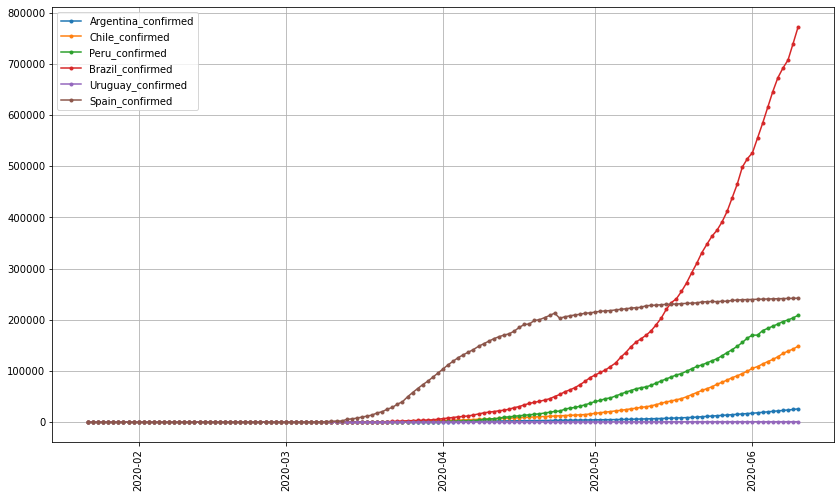

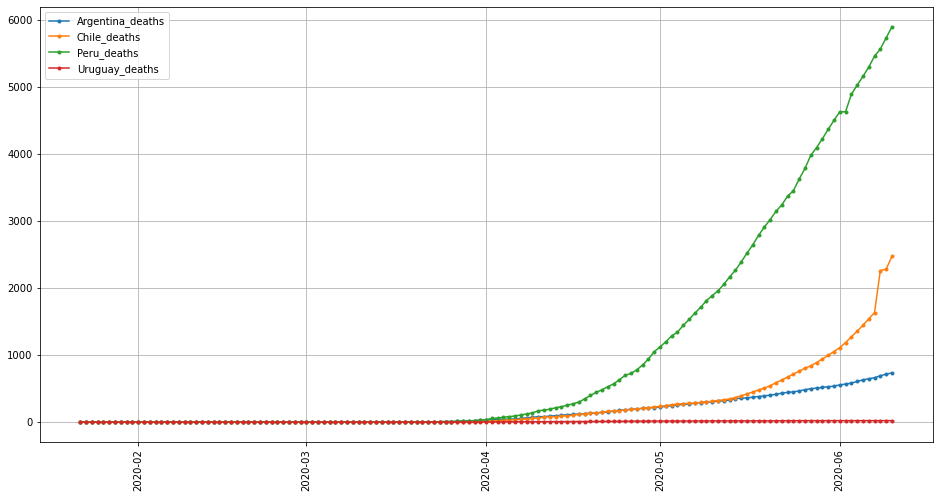

In [306]:
ax = None
import matplotlib.pyplot as plt

def plotregions(dataset, placelist, legend):
    for place in placelist:
        normalized_data = parse_by_region(dataset, place)
        npf1 = normalized_data

        x = []
        y = []
        for n,frame in enumerate(npf1):
            date = frame[n]['date']
            val = frame[n]['count']
            x.append(date)
            y.append(val)

        ax.plot(x,y,'o-', markersize=3, label=place+legend)

        
regions = ['Argentina','Chile', 'Peru', 'Brazil', 'Uruguay', 'Spain']

fig = plt.figure(figsize=(14,8))
ax= fig.subplots()

plotregions(pd_dataset['confirmed'], regions, '_confirmed')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

regions = ['Argentina','Chile', 'Peru', 'Uruguay']
fig = plt.figure(figsize=(16,8))
ax= fig.subplots()
plotregions(pd_dataset['deaths'], regions, '_deaths')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

## Converting Python's dict() to pandas.DataFrame()

In [308]:
regions = ['Argentina','Chile', 'Peru', 'Brazil', 'Uruguay', 'Spain', 'France', 'US', 'Germany', 'Sweden', 'Russia']

def by_place(ds, reg):
    locs = {}
    for place in reg:
        dates = []
        counts = []
        ndata = parse_by_region(ds, place)
        for n,frame in enumerate(ndata):
            date = frame[n]['date']
            val = frame[n]['count']
            dates.append(date)
            counts.append(val)

        _df2 = pd.DataFrame({'dates': dates, 'counts': counts}) 
        locs[place] = _df2
    return locs

confirmed = by_place(pd_dataset['confirmed'], regions)
deaths = by_place(pd_dataset['deaths'], regions)
recovered = by_place(pd_dataset['recovered'], regions)

print( deaths['Argentina'].describe() )
print( confirmed['Argentina'].describe() )

          counts
count 141.000000
mean  153.241135
std   205.607285
min     0.000000
25%     0.000000
50%    28.000000
75%   273.000000
max   735.000000
            counts
count   141.000000
mean   4078.574468
std    6258.857281
min       0.000000
25%       0.000000
50%    1054.000000
75%    5208.000000
max   25987.000000


## Calculate some stats on the pandas (mu, variance, mean)

- Notice Mu, Sigma aren't properly collected
- Small variations from Numpy, Pandas and by-hand calculations
- Verify all the formulas again.

In [309]:

s = deaths['Argentina'] #numero de tests a saltear

_len = len(s)
cumsum = s.sum()  # sum function is wrong

#mu=12;sigma=0.25
mu = cumsum/s.size
#mean =  (s-mu)**2
#mean = np.mean(s, axis=1)
mean = s.mean()[0]
variance = np.var(s, ddof=1)
#variance = rr.var()[0]
#variance = (1/_len) * s.max()# Its wrong as its a cumulative sum
sigma = np.sqrt(variance)

print("mu = ", mu)
print("mean = ", mean)
print("variance = ", variance)
print("sigma = ", sigma)

print ("Mu - Mean < 0.01", abs(mu - np.mean(s)) < 0.01   )# must be true
print ("Sigma - Std < 0.01", abs(sigma - np.std(s, ddof=1)) < 0.01  ) # must be true

mu =  counts   76.620567
dtype: float64
mean =  153.24113475177305
variance =  counts   42274.355724
dtype: float64
sigma =  counts   205.607285
dtype: float64
Mu - Mean < 0.01 counts    False
dtype: bool
Sigma - Std < 0.01 counts    True
dtype: bool


### Patch some data

- Pandas need source datetime format reformatting
- Datetimes don't run fine for matplotlib. curious.

In [310]:
confirmed = by_place(pd_dataset['confirmed'], regions)
deaths = by_place(pd_dataset['deaths'], regions)
recovered = by_place(pd_dataset['recovered'], regions)

confirmed['Argentina'].iloc[1]

def fixdate(ds):
    ds['dates'] = pd.to_datetime(ds['dates'].astype(str), format='%Y-%m-%d')
    ds['dates'] = ds['dates'].dt.strftime('%d/%m/%Y')
    return ds
    
s = fixdate( deaths['Argentina'])
ss = fixdate( confirmed['Argentina'])

<Figure size 432x288 with 0 Axes>

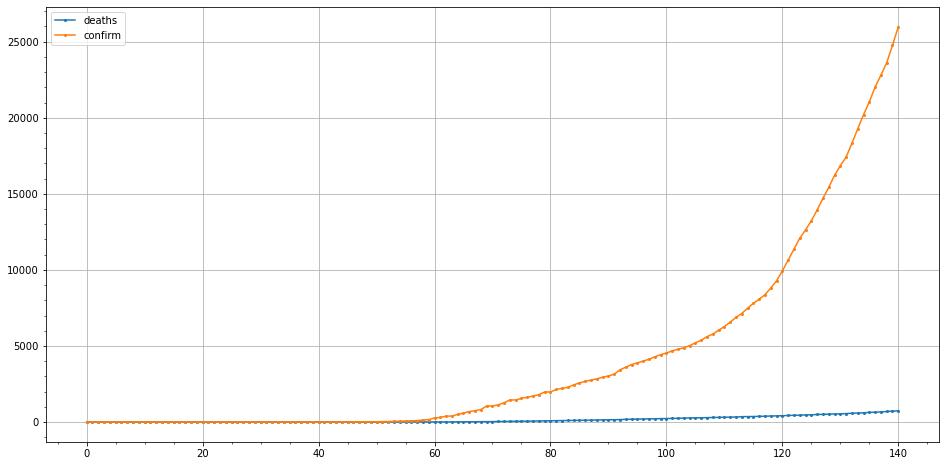

In [311]:
plt.tight_layout()
fig = plt.figure(figsize=(16,8))
ax = fig.subplots()

ax.plot(s.index,s.counts, 'o-', markersize=2,  label='deaths')
ax.plot(ss.index,ss.counts, 'o-', markersize=2, label='confirm')

plt.legend()
ax.set_axisbelow(True)
ax.minorticks_on()
plt.grid(True)
plt.show()

### Some histogram from pandas data won't work at all 

- What a pandas.value means
- Datetimes are parsed as linear or something
- The deviation furmula isn't right.

ValueError: Length of passed values is 91, index implies 1.

<Figure size 1080x432 with 0 Axes>

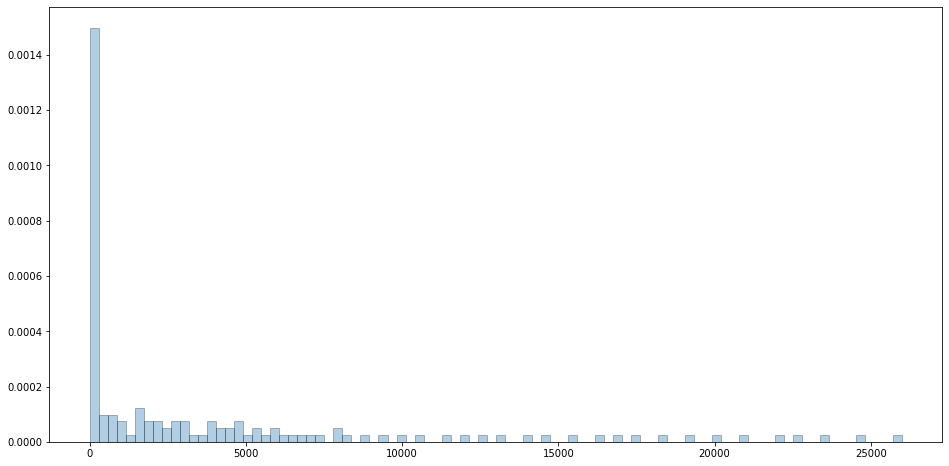

In [325]:
plt.rcParams["figure.figsize"]=15,6

plt.tight_layout()
fig = plt.figure(figsize=(16,8))
ax = fig.subplots()

data = ss.counts
count, bins, ignored = ax.hist(data, bins= 90, density=True, stacked=True, cumulative=False, alpha=0.35, lw=0.8, edgecolor='black') # , color='green'

#print(count)
#print(ignored)

oneS = 1.2
onesigma = oneS/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )

df3 = pd.DataFrame({'count': bins, 'Deviation': onesigma })
df3.plot(kind='scatter', x='count', y='Deviation', ax=ax, alpha=0.9, lw=0.8, color='indigo')

min_ylim, max_ylim = plt.ylim()
ax.axvline(mu, color='red', linestyle='dashed', linewidth=3)
plt.text(mu*1.02, max_ylim*1.02, '$\mu$: {:.2f}'.format(mu))

ax.axvline(mu+sigma*oneS, color='green', linestyle='dashed', linewidth=2)
plt.text(mu+sigma*1.02, max_ylim*1.02, '$\mu$ + $\sigma$: {:.2f}'.format(mu+sigma))

ax.set_axisbelow(True)
ax.minorticks_on()

ax.grid(which='major', linestyle='-', alpha=0.65, linewidth='0.5', color='navy')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show() ## This graph is wrong. it's just orientative for developing a cumsum() formula

In [326]:
dist = {}
R = count
for i in range(len(R)-1):
    date = 
    value = np.float(R[i+1]-R[i] )
    dist['date'] = date
    dist['value'] = value

for i in range(len(dist)):
    if dist[i]>0.0001:
        print (i, dist[i])

SyntaxError: invalid syntax (<ipython-input-326-d1e816c8a25c>, line 4)

KeyError: 'date'

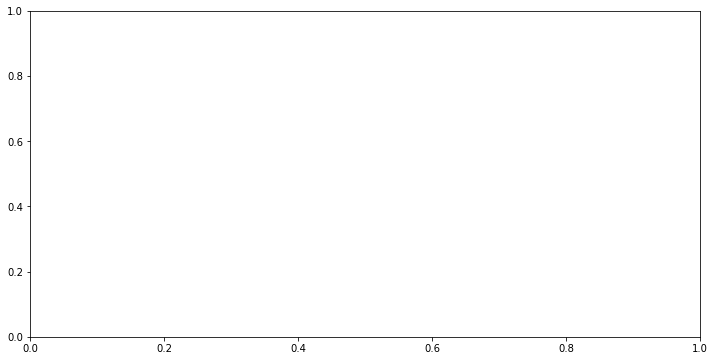

In [333]:
plt.rcParams["figure.figsize"]=12,6
fig, ax1 = plt.subplots()

ss.plot(kind='line', x='date', y='count', ax=ax1, alpha=0.9, lw=1.8, color='orange')

ax1.set_axisbelow(True)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', alpha=0.65, linewidth='0.5', color='navy')
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

plt.show()  # Correct number of positives